In [10]:
#Task 3
#Univariate Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
DATA_PATH = "STUDENTS_CLEANED_DATA - Copy.csv"   
df = pd.read_csv(DATA_PATH)

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", cat_cols)


Numeric columns: ['age', 'study_hours_per_week', 'attendance_rate', 'prior_gpa_10pt', 'test_score', 'fee_paid_inr']
Categorical columns: ['student_id', 'gender', 'city', 'course_stream', 'has_internet', 'device_type', 'parental_education', 'admission_date', 'scholarship', 'comments']


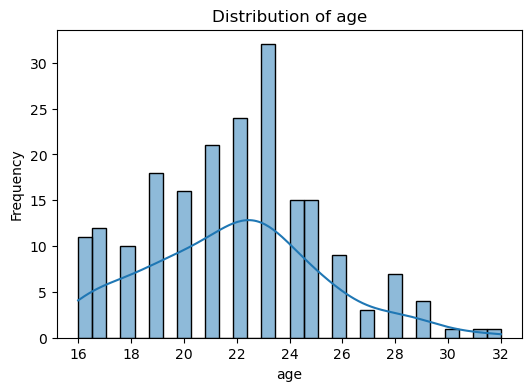

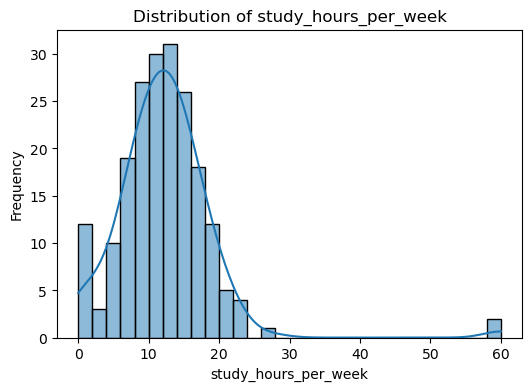

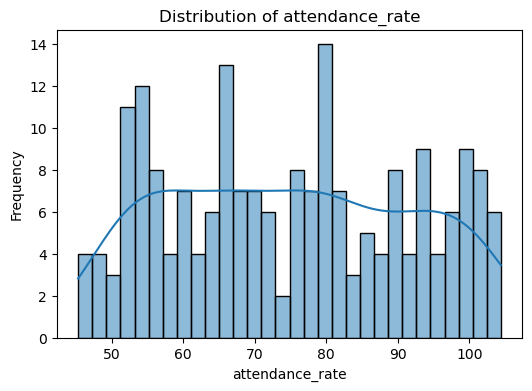

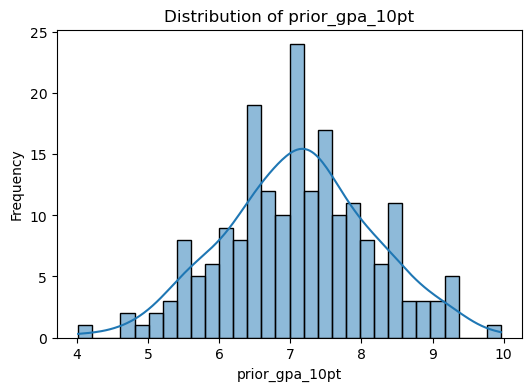

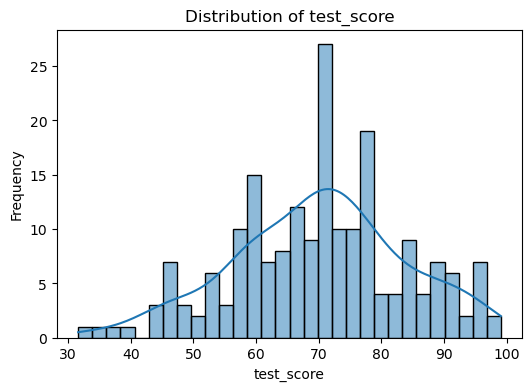

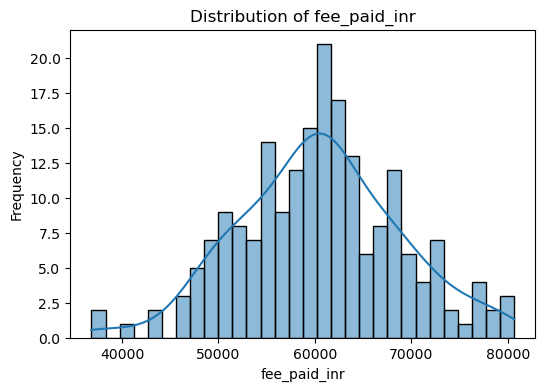

In [8]:
# Distribution plots for numeric variables
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


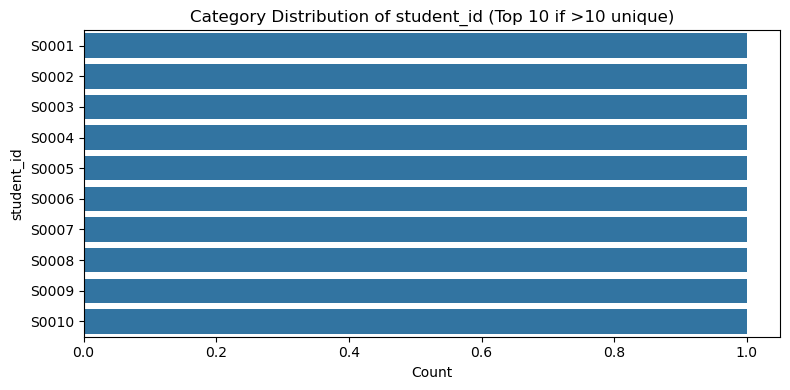

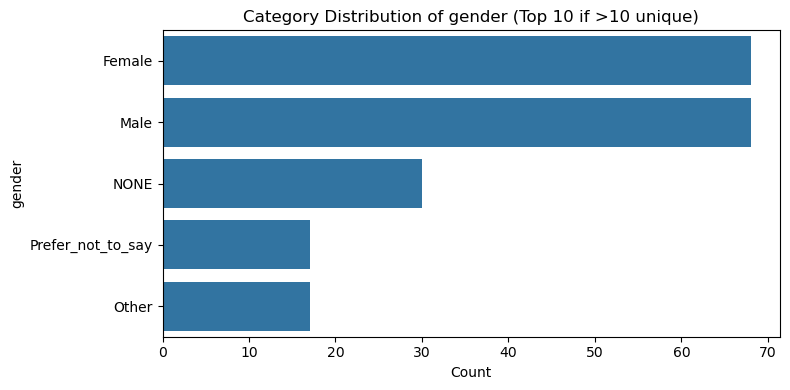

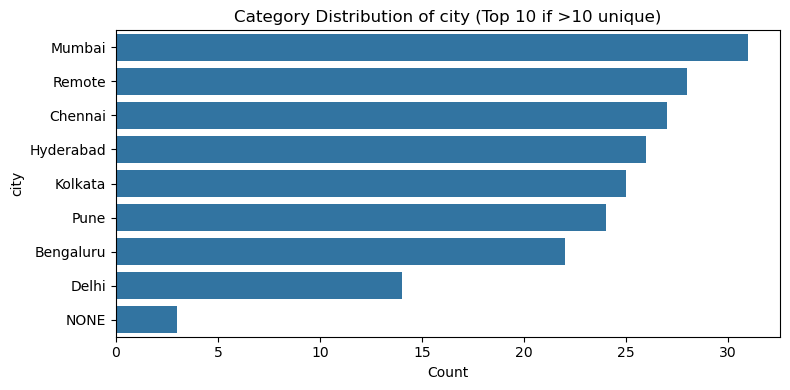

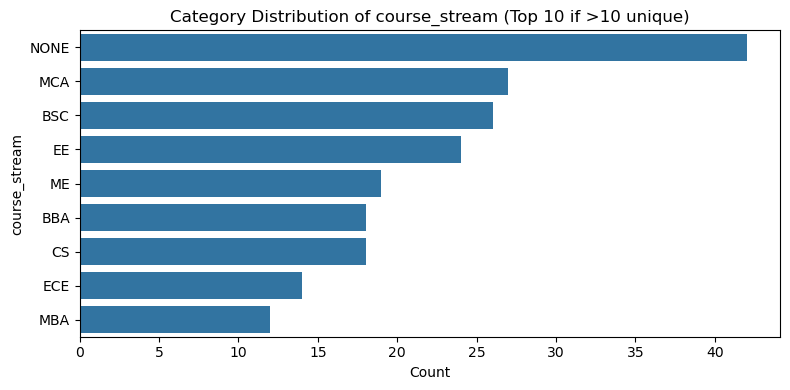

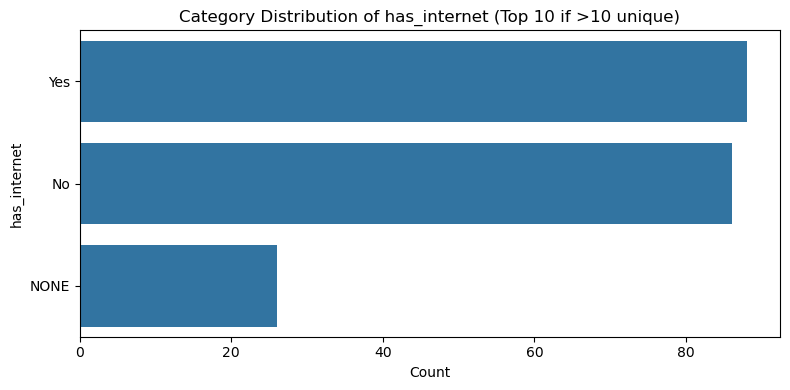

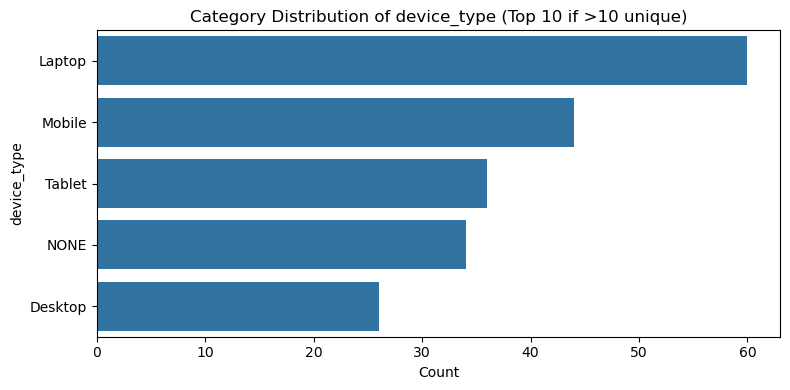

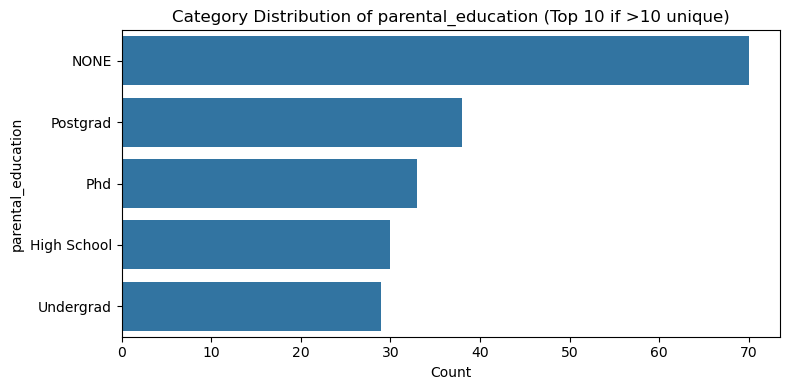

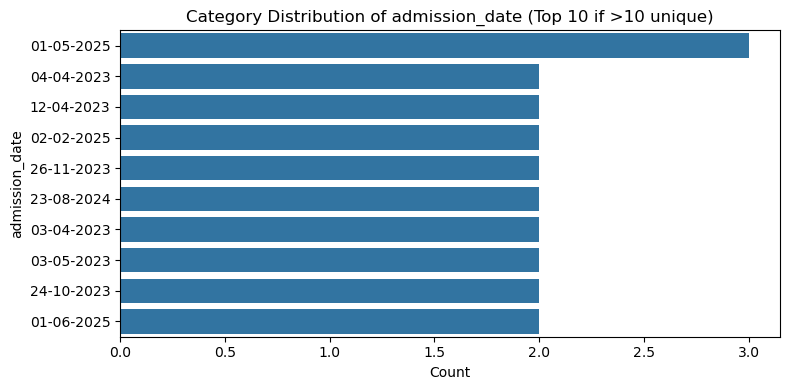

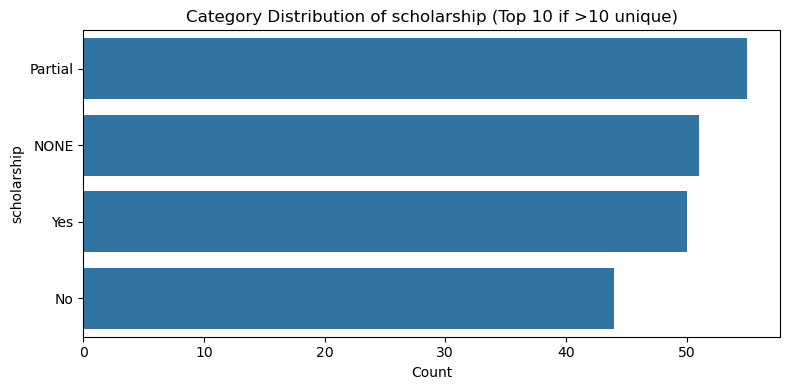

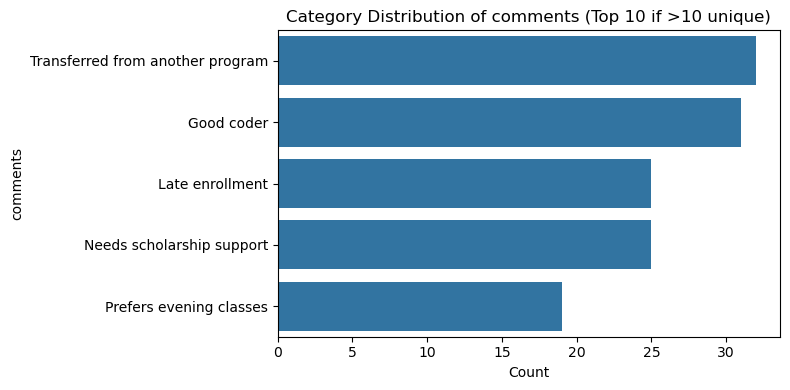

In [11]:
# Bar plots for categorical variables
for col in cat_cols:
    plt.figure(figsize=(8,4))
    # Show only top 10 categories if too many
    topN = df[col].value_counts().nlargest(10).index
    sns.countplot(y=df[col][df[col].isin(topN)], order=topN)
    plt.title(f"Category Distribution of {col} (Top 10 if >10 unique)")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

Numeric columns: ['age', 'study_hours_per_week', 'attendance_rate', 'prior_gpa_10pt', 'test_score', 'fee_paid_inr']
Categorical columns: ['student_id', 'gender', 'city', 'course_stream', 'has_internet', 'device_type', 'parental_education', 'admission_date', 'scholarship', 'comments']


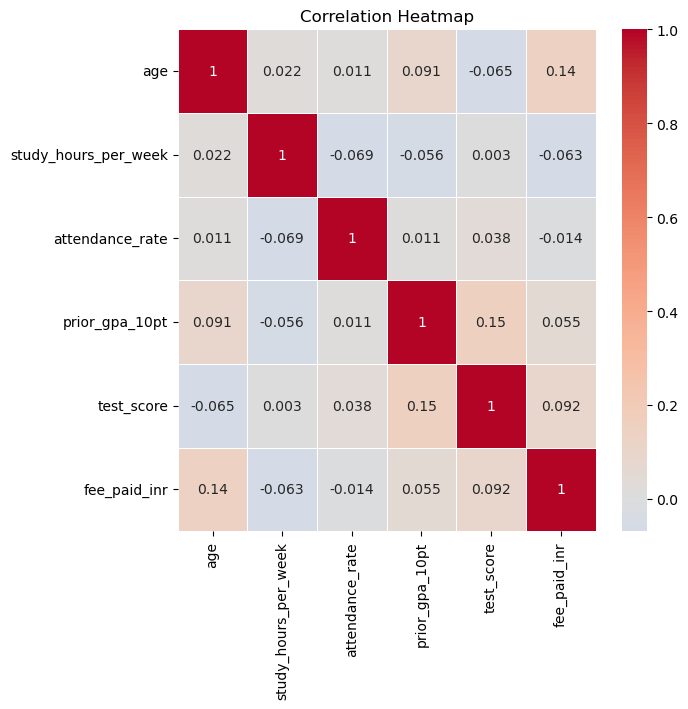

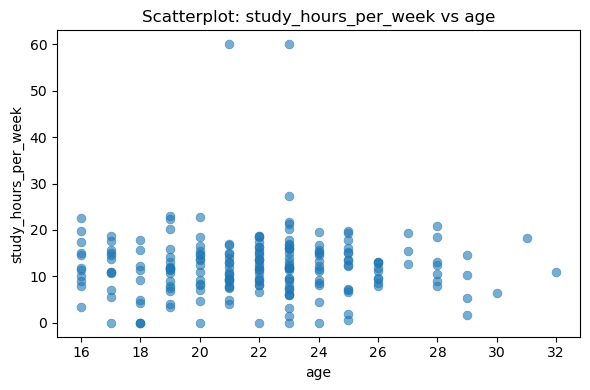

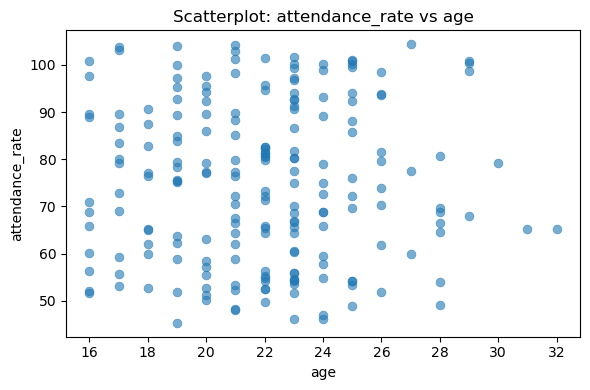

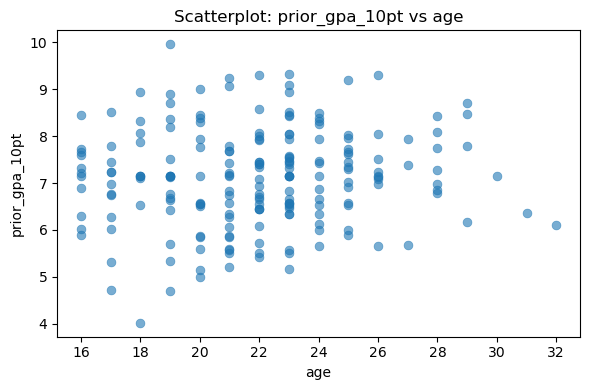

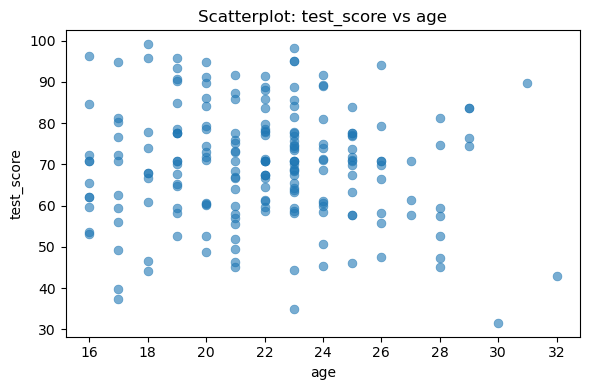

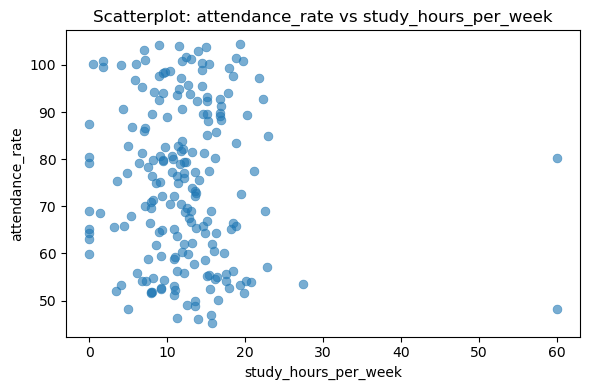

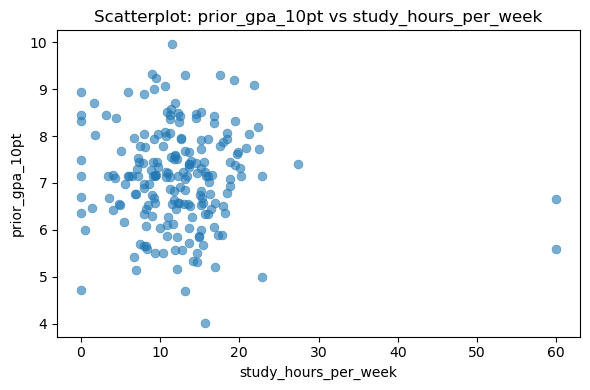

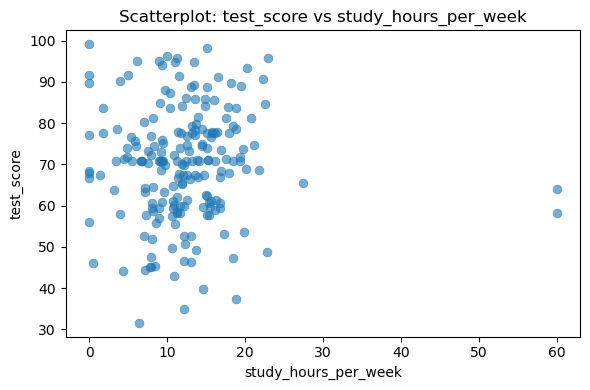

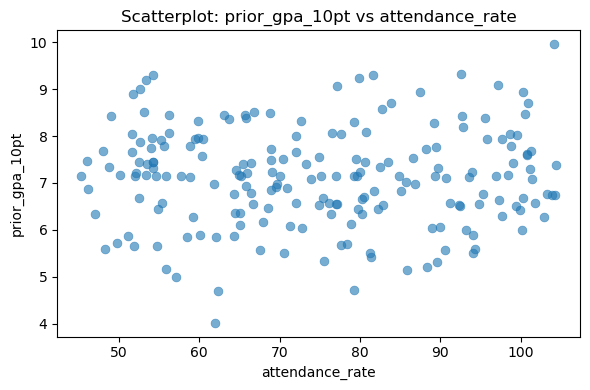

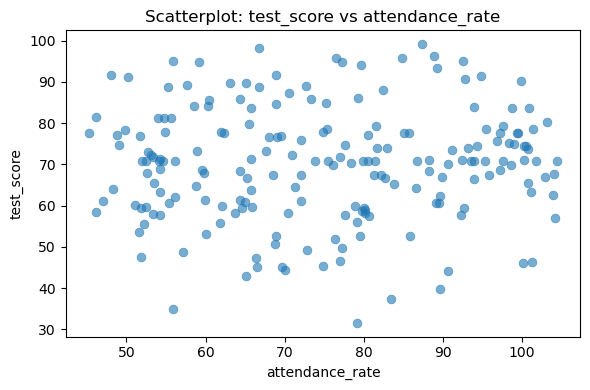

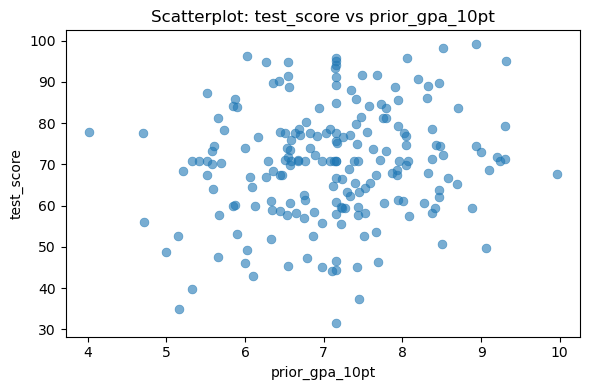

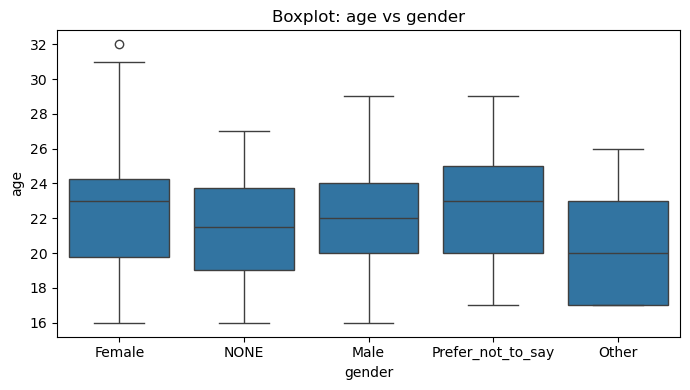

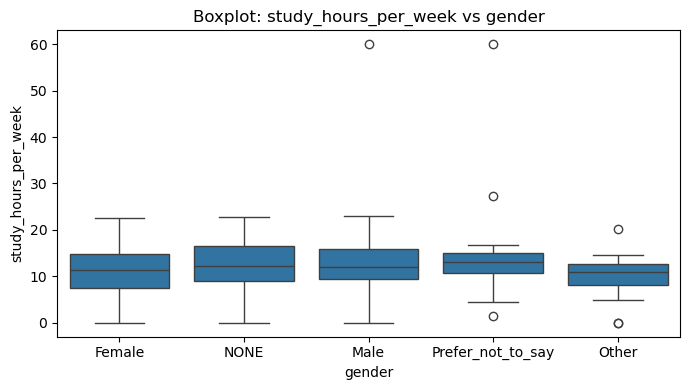

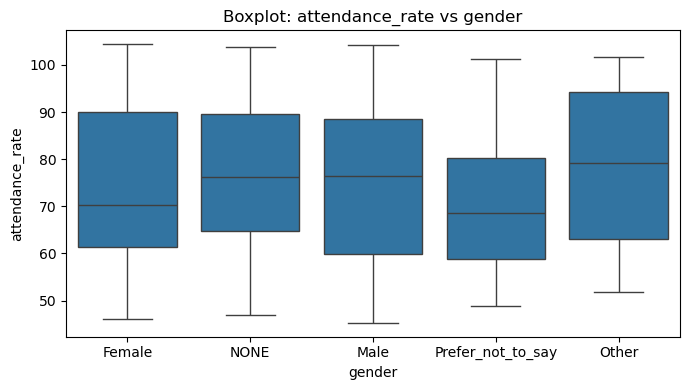

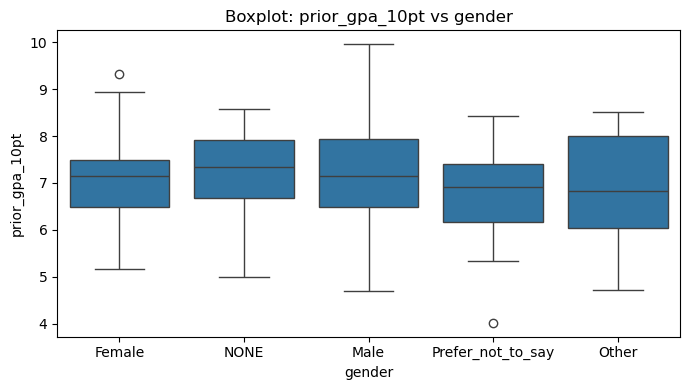

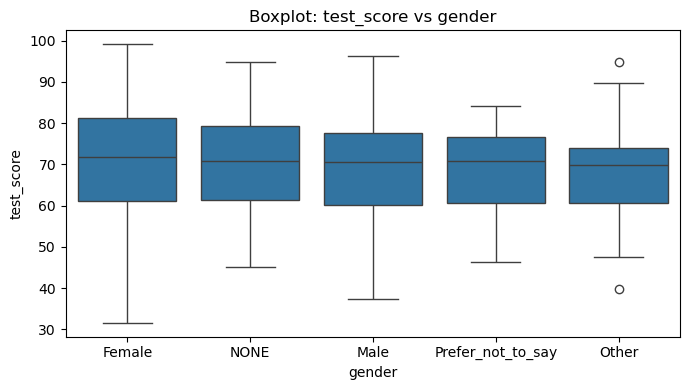

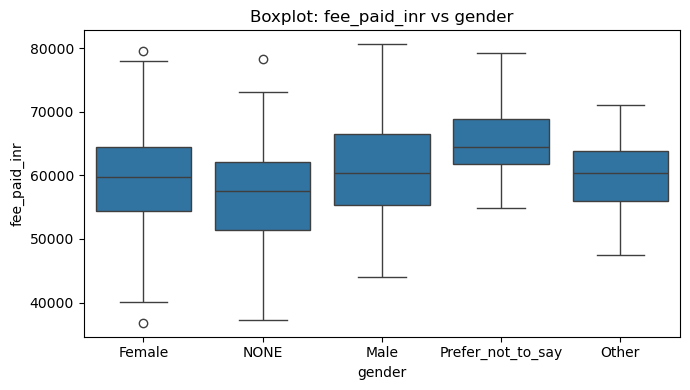

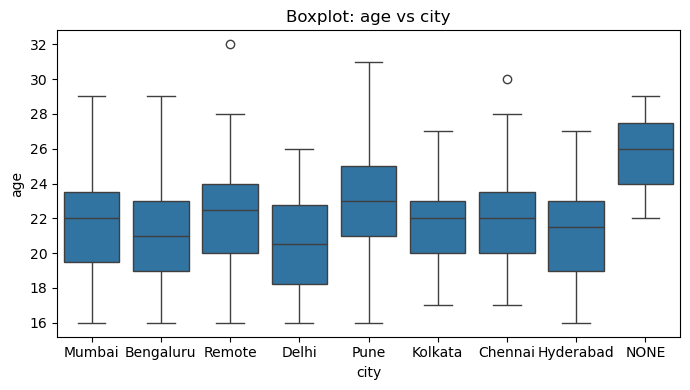

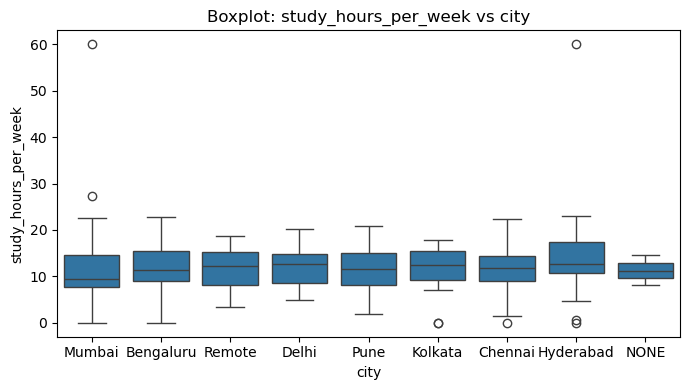

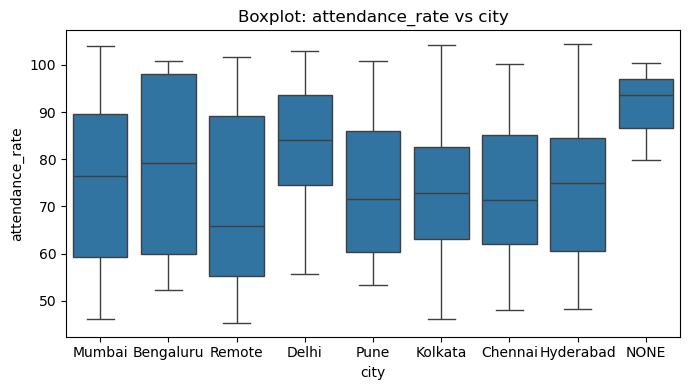

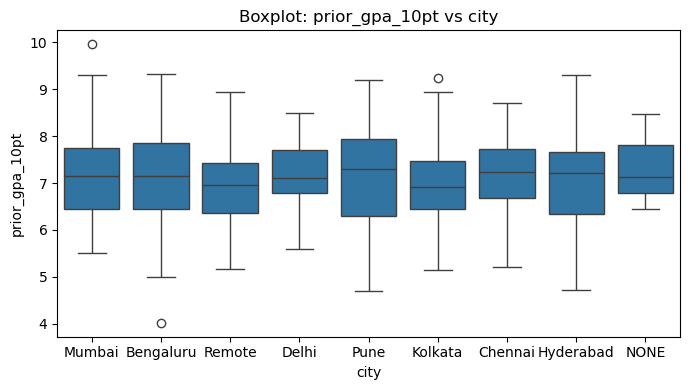

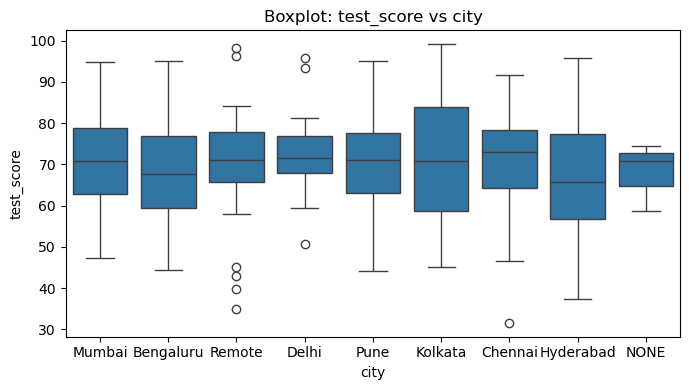

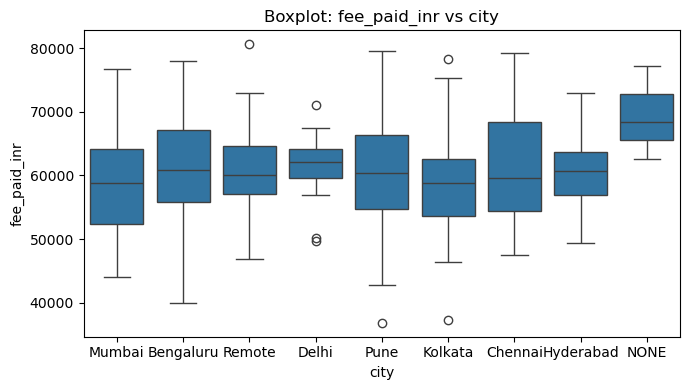

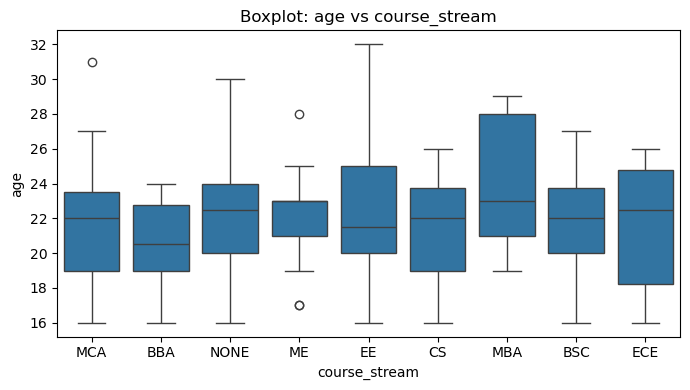

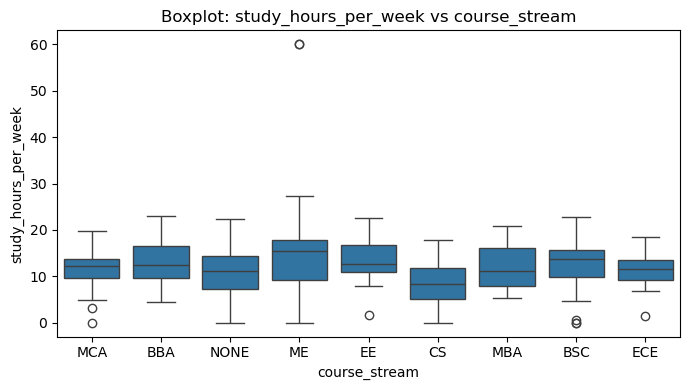

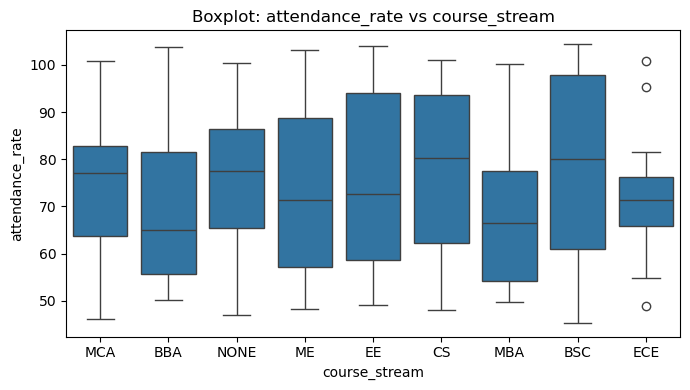

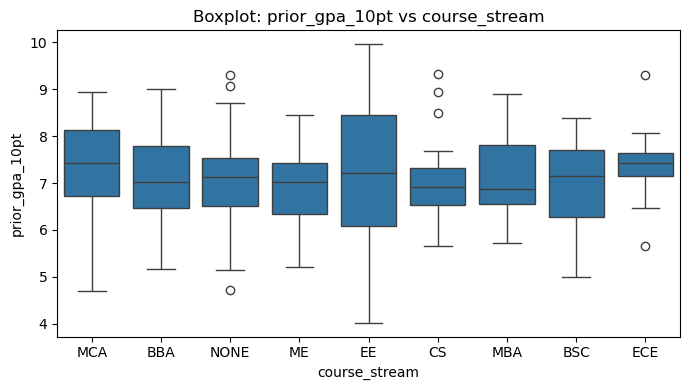

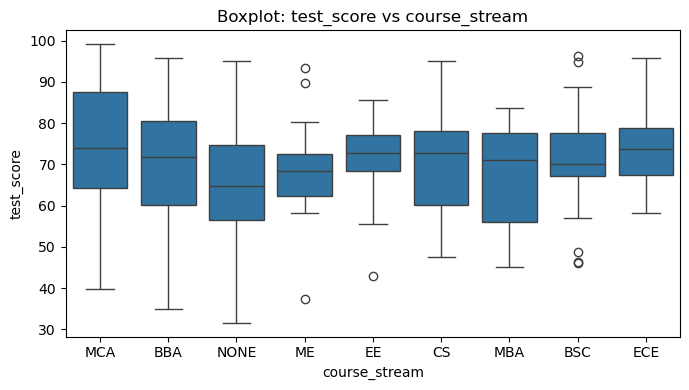

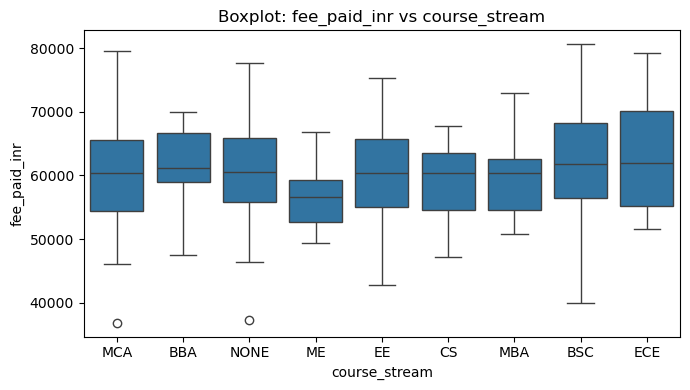

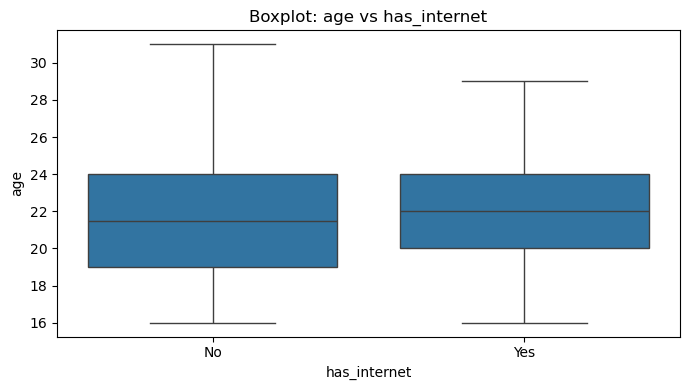

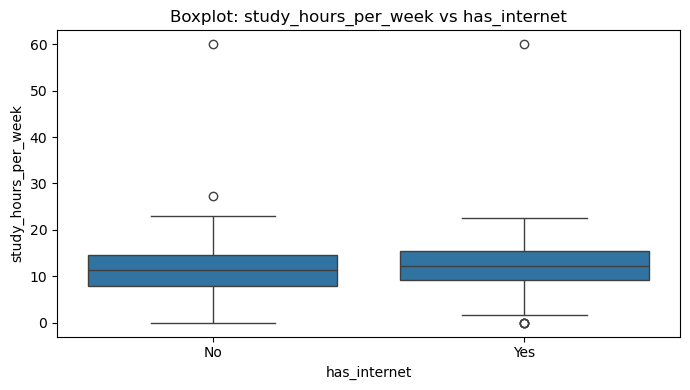

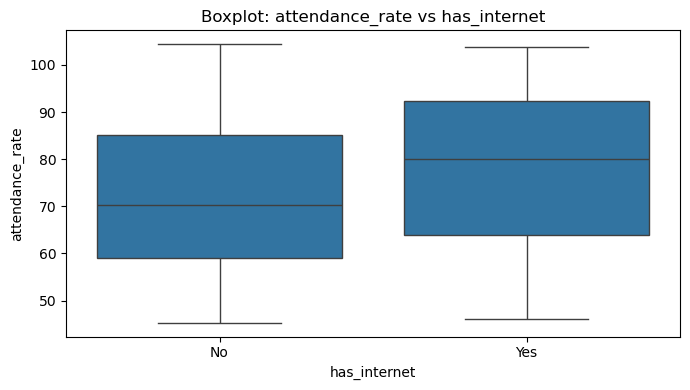

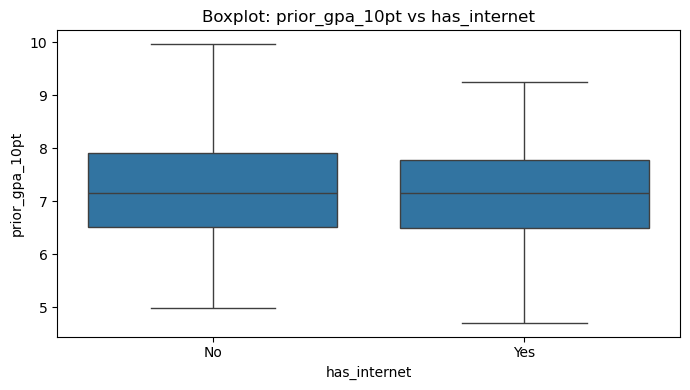

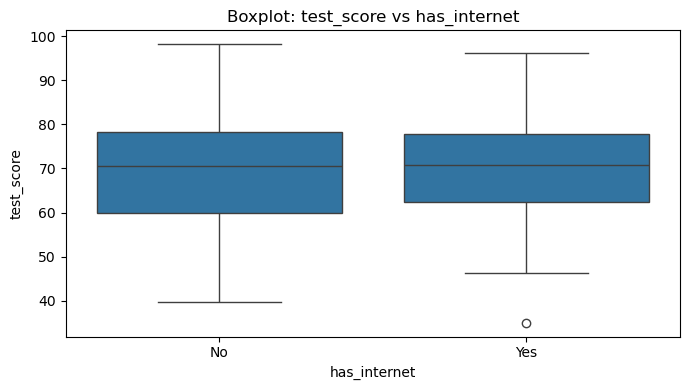

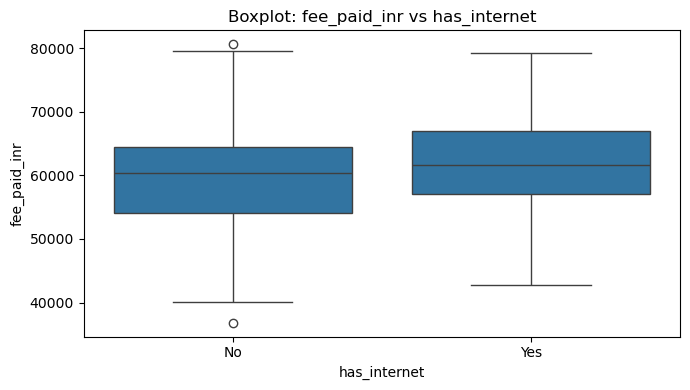

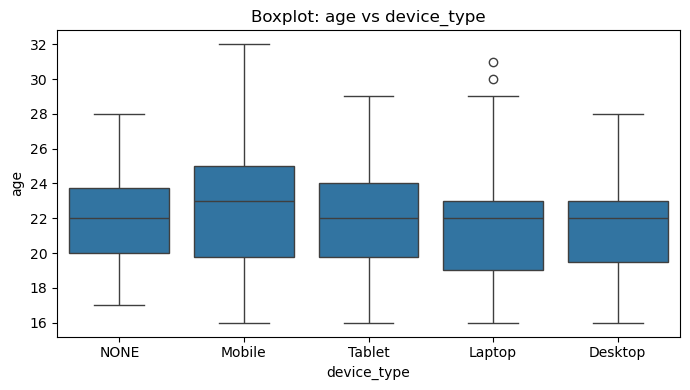

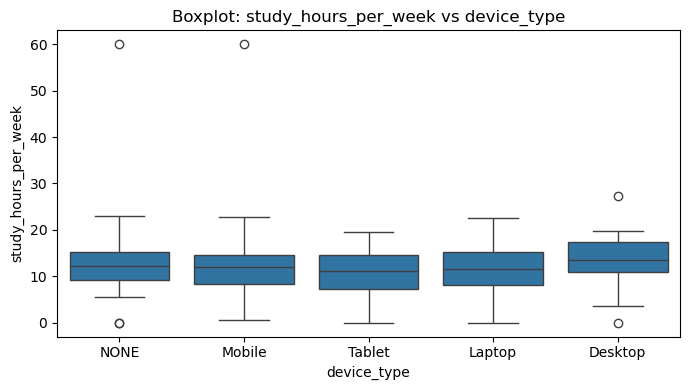

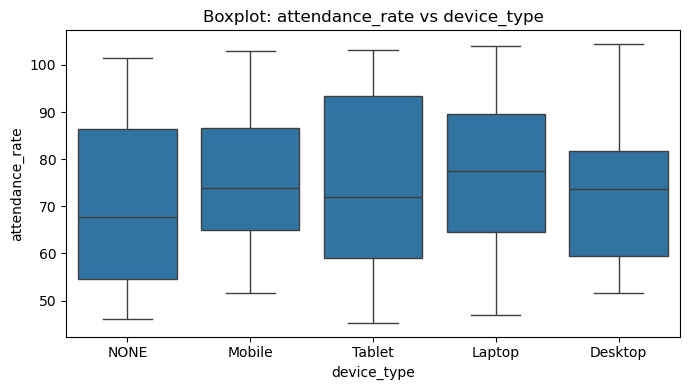

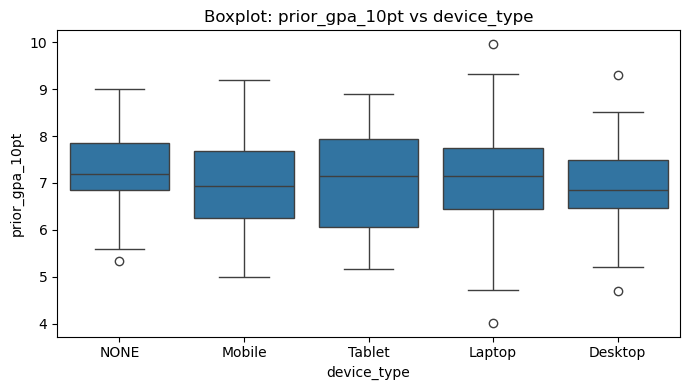

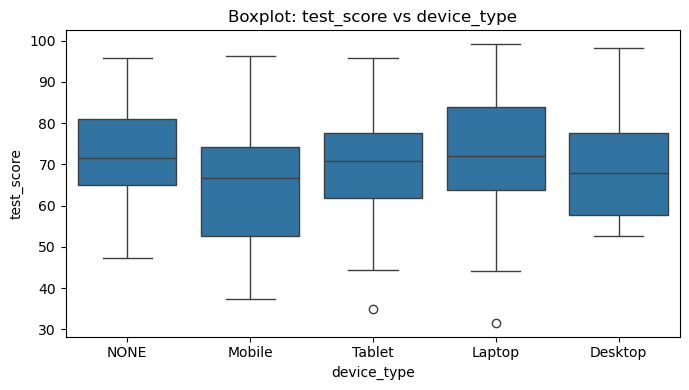

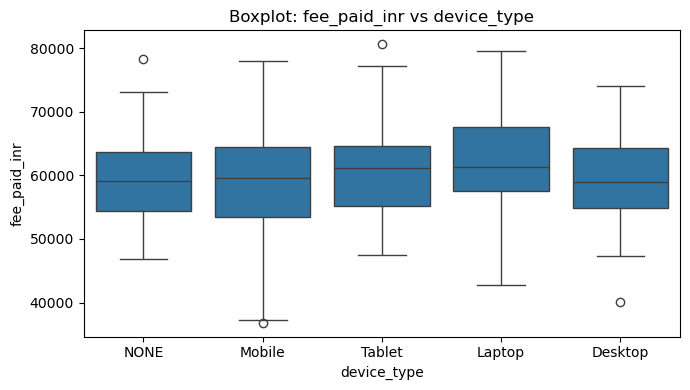

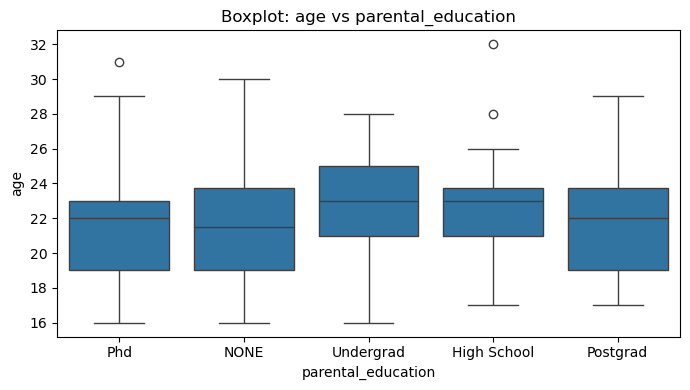

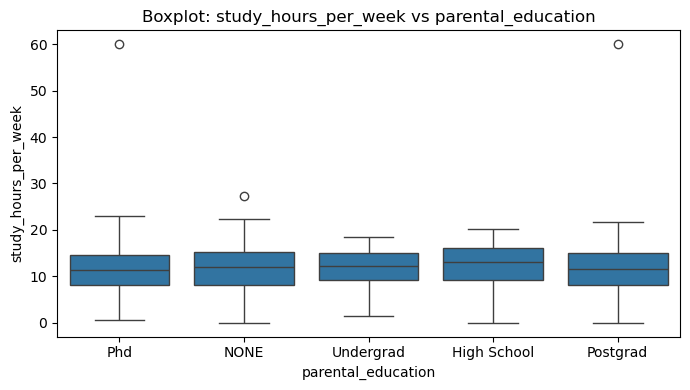

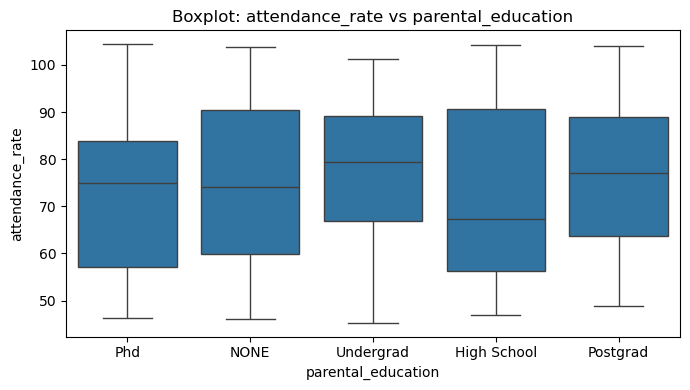

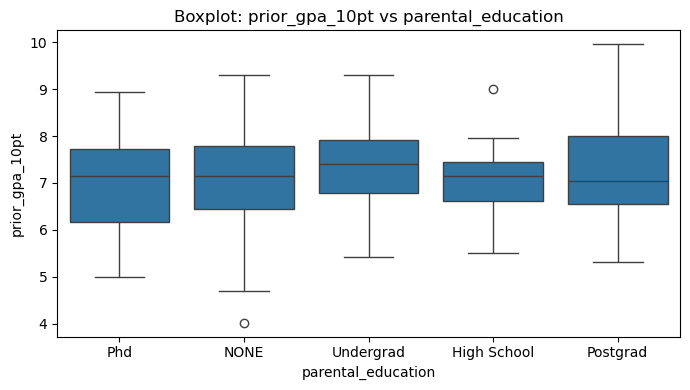

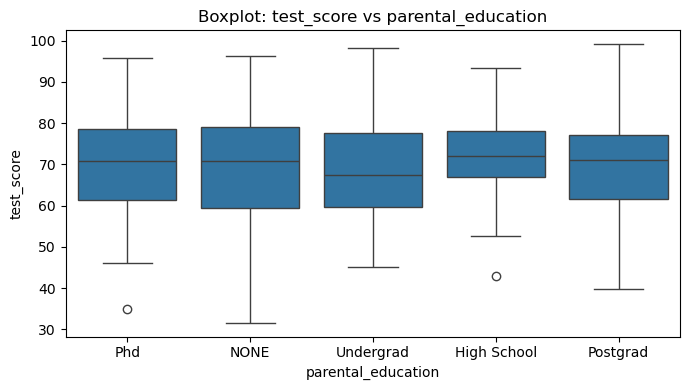

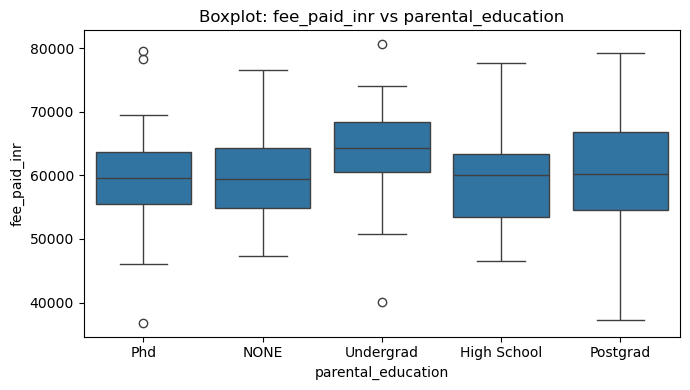

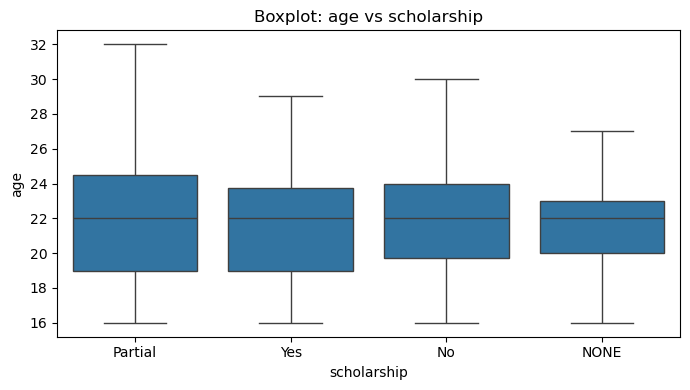

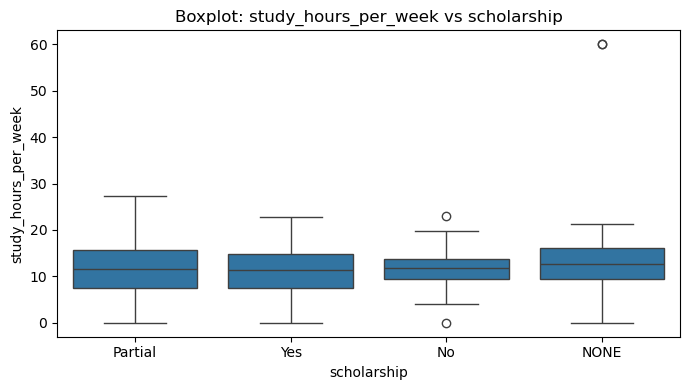

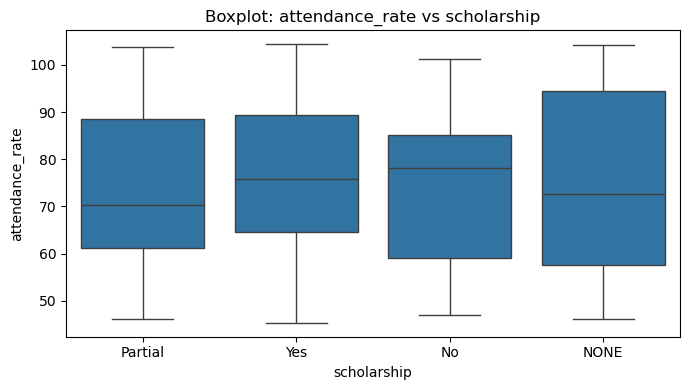

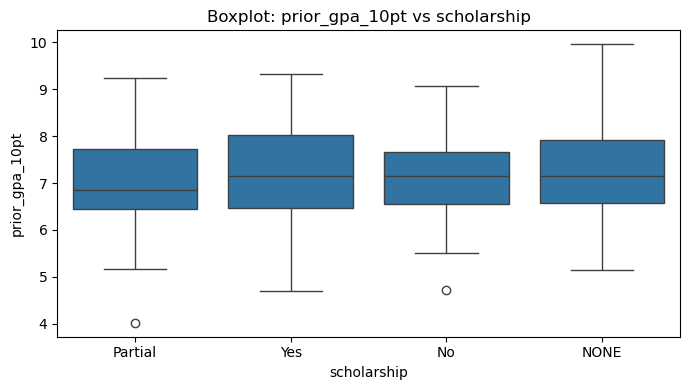

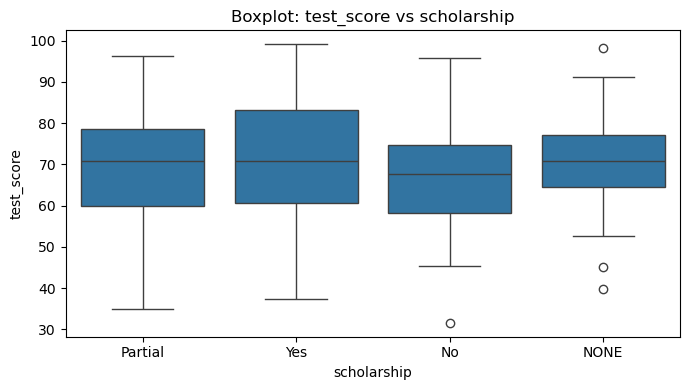

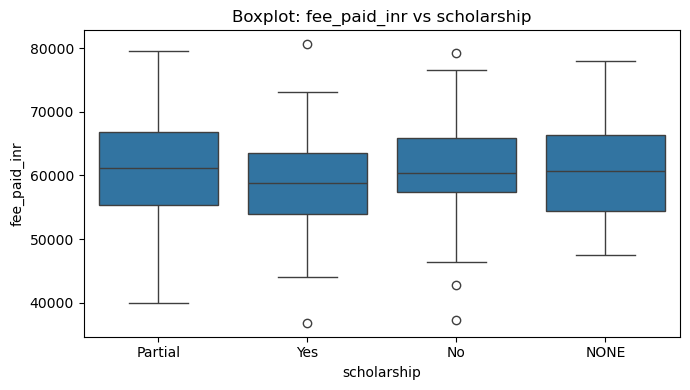

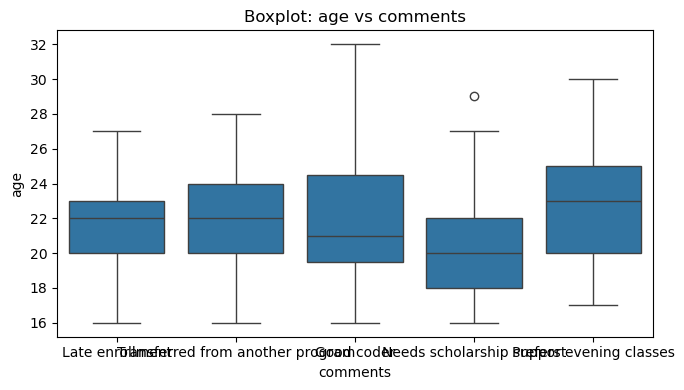

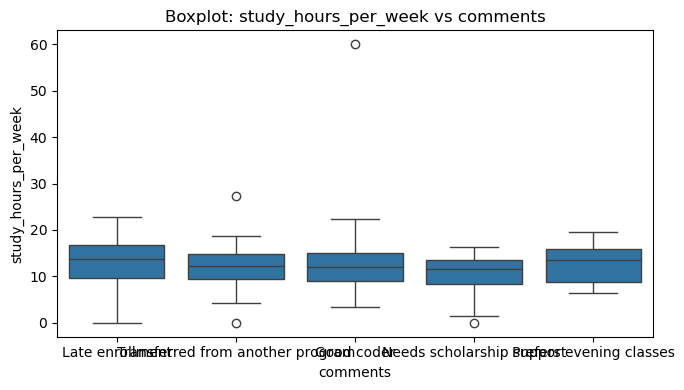

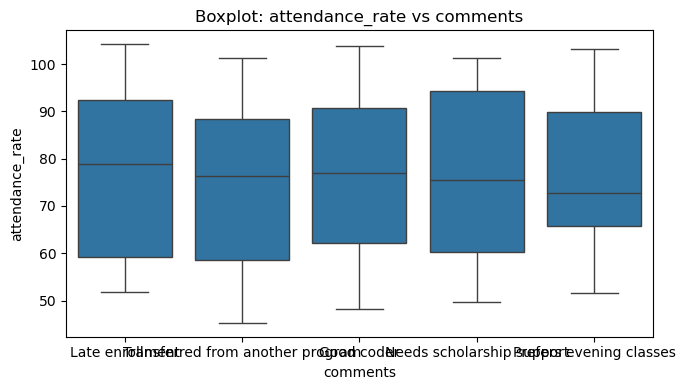

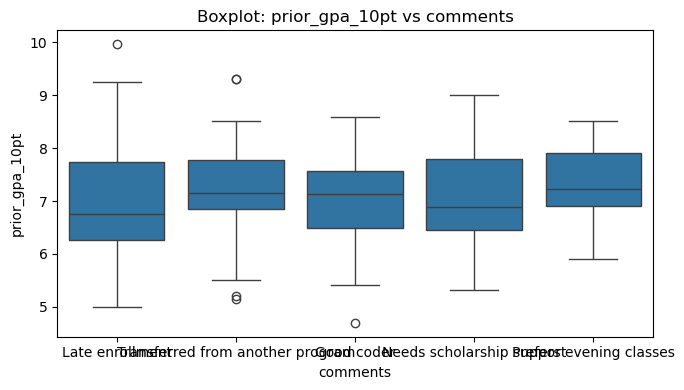

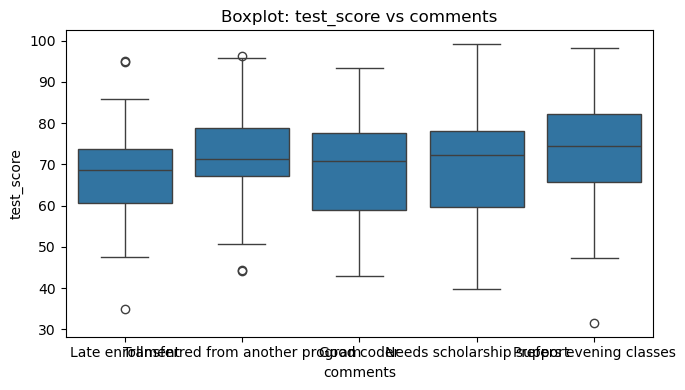

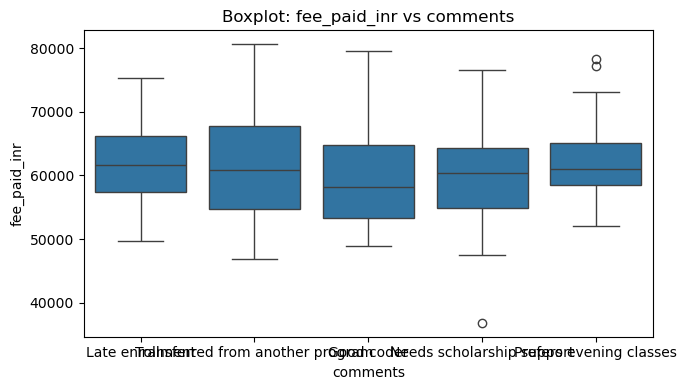

In [24]:
#Bivariate Analysis (Scatterplots, Boxplots, Correlation Heatmap)
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", cat_cols)

# ---------------- Correlation Heatmap ----------------
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(min(12, 1.2*len(numeric_cols)), min(10, 1.2*len(numeric_cols))))
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

# ---------------- Scatterplots ----------------
# limit to first 5 numeric features to avoid too many plots
if len(numeric_cols) >= 2:
    sel_nums = numeric_cols[:5]
    pairs = list(itertools.combinations(sel_nums, 2))
    for (x, y) in pairs:
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[x], y=df[y], alpha=0.6, s=40, edgecolor=None)
        plt.title(f"Scatterplot: {y} vs {x}")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.tight_layout()
        plt.show()

# ---------------- Boxplots ----------------
# Only for categorical variables with ≤ 10 unique categories
for cat in cat_cols:
    if 2 <= df[cat].nunique() <= 10:
        for num in numeric_cols:
            plt.figure(figsize=(7,4))
            sns.boxplot(x=df[cat], y=df[num])
            plt.title(f"Boxplot: {num} vs {cat}")
            plt.xlabel(cat)
            plt.ylabel(num)
            plt.tight_layout()
            plt.show()


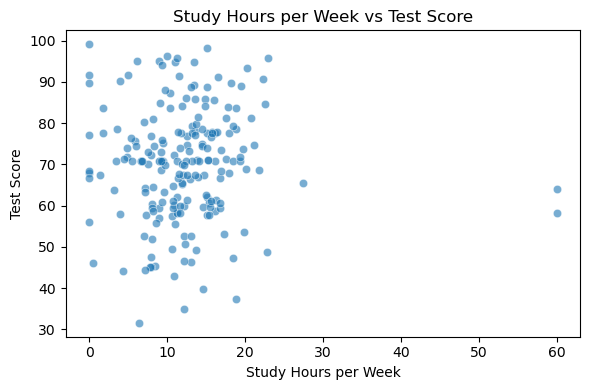

Correlation (study_hours_per_week vs test_score): 0.00, p-value=0.9661

Using internet column: has_internet


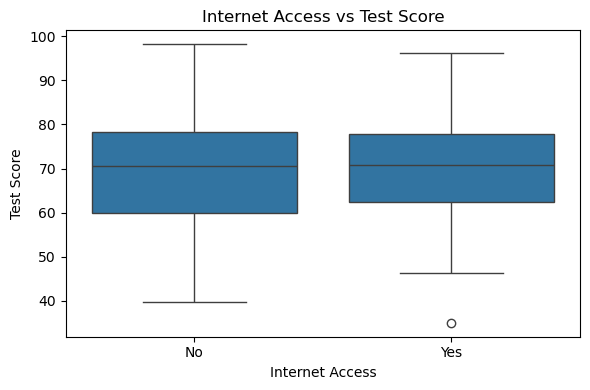

Group sizes: No = 86, Yes = 88
Means: No = 69.85, Yes = 71.05
T-test ( Yes vs No ): t = -0.61, p = 0.5452


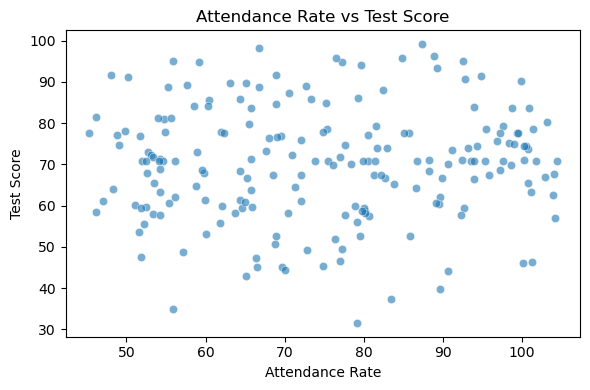

Correlation (attendance_rate vs test_score): 0.04, p-value=0.5933


In [23]:
#Identify Relationships (Study Hours, Internet Access, Attendance)
# ---------------- 1. Study hours vs Test score ----------------
if "study_hours_per_week" in df.columns and "test_score" in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df["study_hours_per_week"], y=df["test_score"], alpha=0.6)
    plt.title("Study Hours per Week vs Test Score")
    plt.xlabel("Study Hours per Week")
    plt.ylabel("Test Score")
    plt.tight_layout()
    plt.show()

    # Correlation
    corr, pval = pearsonr(df["study_hours_per_week"].dropna(), df["test_score"].dropna())
    print(f"Correlation (study_hours_per_week vs test_score): {corr:.2f}, p-value={pval:.4f}")

# ---------------- 2. Internet access vs Performance ----------------
internet_col = None
for c in df.columns:
    if "internet" in c.lower():
        internet_col = c
        break

if internet_col and "test_score" in df.columns:
    print(f"\nUsing internet column: {internet_col}")

   
    df[internet_col] = df[internet_col].replace({'NONE': np.nan})

    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[internet_col], y=df["test_score"])
    plt.title("Internet Access vs Test Score")
    plt.xlabel("Internet Access")
    plt.ylabel("Test Score")
    plt.tight_layout()
    plt.show()

    # T-test only if 2 groups remain
    groups = df[internet_col].dropna().unique()
    if len(groups) == 2:
        g1 = df[df[internet_col] == groups[0]]["test_score"].dropna()
        g2 = df[df[internet_col] == groups[1]]["test_score"].dropna()
        print(f"Group sizes: {groups[0]} = {len(g1)}, {groups[1]} = {len(g2)}")
        print(f"Means: {groups[0]} = {g1.mean():.2f}, {groups[1]} = {g2.mean():.2f}")
        tstat, pval = ttest_ind(g1, g2, equal_var=False)
        print(f"T-test ( {groups[1]} vs {groups[0]} ): t = {tstat:.2f}, p = {pval:.4f}")
    else:
        print("Internet column has more than 2 groups; skipping t-test.")

# ---------------- 3. Attendance rate vs Test performance ----------------
if "attendance_rate" in df.columns and "test_score" in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df["attendance_rate"], y=df["test_score"], alpha=0.6)
    plt.title("Attendance Rate vs Test Score")
    plt.xlabel("Attendance Rate")
    plt.ylabel("Test Score")
    plt.tight_layout()
    plt.show()

    # Correlation
    corr, pval = pearsonr(df["attendance_rate"].dropna(), df["test_score"].dropna())
    print(f"Correlation (attendance_rate vs test_score): {corr:.2f}, p-value={pval:.4f}")


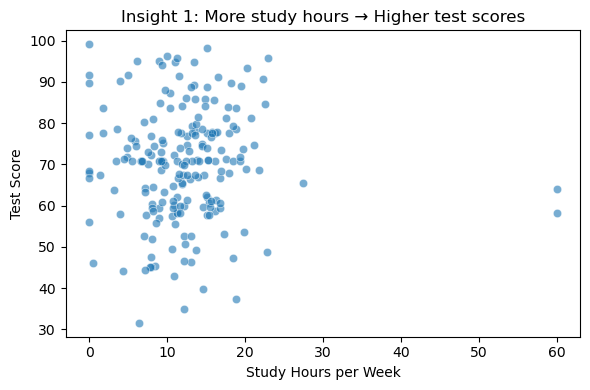

Insight 1: Correlation between study hours and test score = 0.00 (p=0.9661)


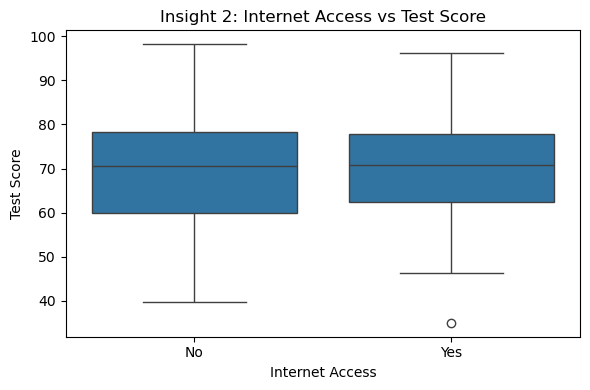

Insight 2: Mean No = 69.85, Mean Yes = 71.05


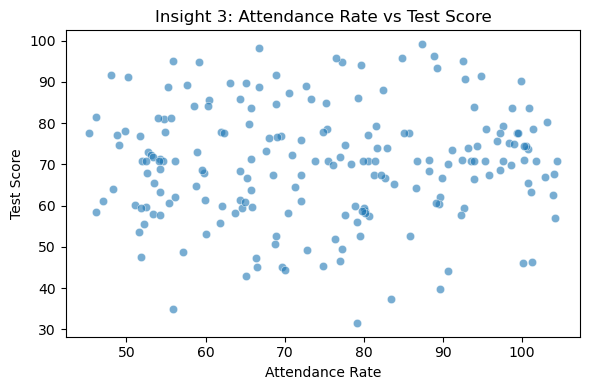

Insight 3: Correlation between attendance and test score = 0.04 (p=0.5933)


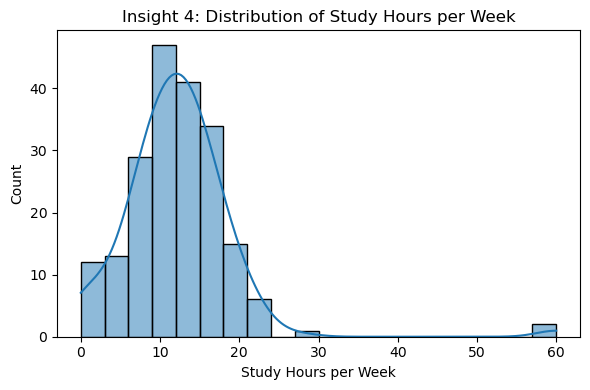

Insight 4: Most students study less than 15 hours/week — target group for intervention.


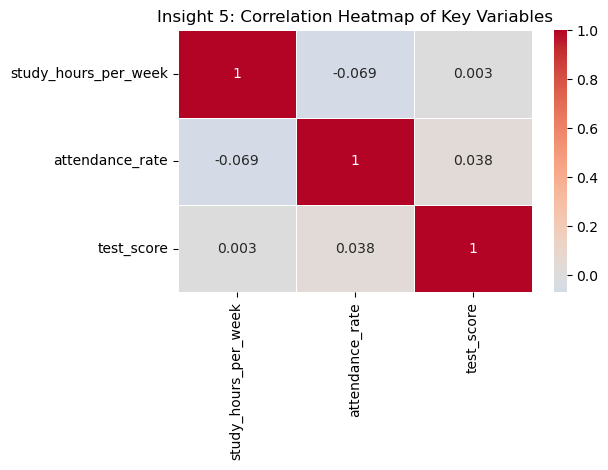

Insight 5: Both study_hours_per_week and attendance_rate show positive correlation with test_score.


In [25]:
#Actionable Insights with Supporting Plots
# Load dataset
DATA_PATH = "STUDENTS_CLEANED_DATA - Copy.csv"
df = pd.read_csv(DATA_PATH)

#Insight 1: Study hours positively impact test performance 
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["study_hours_per_week"], y=df["test_score"], alpha=0.6)
plt.title("Insight 1: More study hours → Higher test scores")
plt.xlabel("Study Hours per Week")
plt.ylabel("Test Score")
plt.tight_layout()
plt.show()

corr, pval = pearsonr(df["study_hours_per_week"].dropna(), df["test_score"].dropna())
print(f"Insight 1: Correlation between study hours and test score = {corr:.2f} (p={pval:.4f})")

# Insight 2: Internet access provides a small advantage
df["has_internet"] = df["has_internet"].replace({"NONE": np.nan})
plt.figure(figsize=(6,4))
sns.boxplot(x=df["has_internet"], y=df["test_score"])
plt.title("Insight 2: Internet Access vs Test Score")
plt.xlabel("Internet Access")
plt.ylabel("Test Score")
plt.tight_layout()
plt.show()

groups = df["has_internet"].dropna().unique()
if len(groups) == 2:
    g1 = df[df["has_internet"] == groups[0]]["test_score"].dropna()
    g2 = df[df["has_internet"] == groups[1]]["test_score"].dropna()
    print(f"Insight 2: Mean {groups[0]} = {g1.mean():.2f}, Mean {groups[1]} = {g2.mean():.2f}")

# Insight 3: Higher attendance improves test performance
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["attendance_rate"], y=df["test_score"], alpha=0.6)
plt.title("Insight 3: Attendance Rate vs Test Score")
plt.xlabel("Attendance Rate")
plt.ylabel("Test Score")
plt.tight_layout()
plt.show()

corr, pval = pearsonr(df["attendance_rate"].dropna(), df["test_score"].dropna())
print(f"Insight 3: Correlation between attendance and test score = {corr:.2f} (p={pval:.4f})")

#Insight 4: Distribution of study hours shows most students study less
plt.figure(figsize=(6,4))
sns.histplot(df["study_hours_per_week"].dropna(), bins=20, kde=True)
plt.title("Insight 4: Distribution of Study Hours per Week")
plt.xlabel("Study Hours per Week")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print("Insight 4: Most students study less than 15 hours/week — target group for intervention.")

# Insight 5: Correlation heatmap highlights strongest predictors
corr = df[["study_hours_per_week","attendance_rate","test_score"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Insight 5: Correlation Heatmap of Key Variables")
plt.tight_layout()
plt.show()

print("Insight 5: Both study_hours_per_week and attendance_rate show positive correlation with test_score.")


In [28]:
# Task 4
# Create new Features

DATA_PATH = "STUDENTS_CLEANED_DATA - Copy.csv"
OUT_PATH  = "STUDENTS_CLEANED_DATA_Features.csv"
DO_ONE_HOT = False

# Load
df = pd.read_csv(DATA_PATH)
print("Loaded:", DATA_PATH)
print("Initial shape:", df.shape)
print()

# 1) attendance_category (Low <50%, Medium 50–75%, High >75%)
df['attendance_rate'] = pd.to_numeric(df['attendance_rate'], errors='coerce')

# If attendance is fraction (0-1) convert to percent
att_nonnull = df['attendance_rate'].dropna()
if not att_nonnull.empty and att_nonnull.max() <= 1.05:
    df['attendance_rate_pct'] = df['attendance_rate'] * 100.0
else:
    df['attendance_rate_pct'] = df['attendance_rate']

# Clip to [0,100] and create categories
df['attendance_rate_pct'] = df['attendance_rate_pct'].clip(lower=0, upper=100)
att_bins = [-np.inf, 50, 75, np.inf]
att_labels = ['Low (<50%)', 'Medium (50-75%)', 'High (>75%)']
df['attendance_category'] = pd.cut(df['attendance_rate_pct'], bins=att_bins, labels=att_labels)

print("Attendance category distribution:")
print(df['attendance_category'].value_counts(dropna=False))
print()

# 2) gpa_band (Low <5, Medium 5–8, High >8) from prior_gpa_10pt
df['prior_gpa_10pt'] = pd.to_numeric(df['prior_gpa_10pt'], errors='coerce')

gpa_bins = [-np.inf, 5, 8, np.inf]
gpa_labels = ['Low (<5)', 'Medium (5-8)', 'High (>8)']
df['gpa_band'] = pd.cut(df['prior_gpa_10pt'], bins=gpa_bins, labels=gpa_labels)

print("GPA band distribution (from prior_gpa_10pt):")
print(df['gpa_band'].value_counts(dropna=False))
print()

# 3) study_hours_bin (discretized study_hours_per_week)
df['study_hours_per_week'] = pd.to_numeric(df['study_hours_per_week'], errors='coerce')

# Equal-width meaningful bins (adjust boundaries if you want)
sh_bins = [-0.1, 5, 10, 15, 20, np.inf]
sh_labels = ['0-5', '6-10', '11-15', '16-20', '20+']
df['study_hours_bin'] = pd.cut(df['study_hours_per_week'].fillna(0), bins=sh_bins, labels=sh_labels, include_lowest=True)

# Quantile bins (quartiles) as alternative
try:
    df['study_hours_qbin'] = pd.qcut(df['study_hours_per_week'].replace(0, np.nan), q=4, labels=['Q1','Q2','Q3','Q4'])
except Exception:
    # fallback if qcut fails (e.g., many identical zeros)
    df['study_hours_qbin'] = pd.cut(df['study_hours_per_week'].fillna(0), bins=4, labels=['Q1','Q2','Q3','Q4'])

print("Study hours bin counts (equal-width):")
print(df['study_hours_bin'].value_counts(dropna=False))
print()
print("Study hours quartile bin counts:")
print(df['study_hours_qbin'].value_counts(dropna=False))
print()
#Save augmented dataframe
df.to_csv(OUT_PATH, index=False)
print("Augmented dataset saved to:", OUT_PATH)
print("Final shape:", df.shape)


Loaded: STUDENTS_CLEANED_DATA - Copy.csv
Initial shape: (200, 16)

Attendance category distribution:
attendance_category
High (>75%)        100
Medium (50-75%)     91
Low (<50%)           9
Name: count, dtype: int64

GPA band distribution (from prior_gpa_10pt):
gpa_band
Medium (5-8)    156
High (>8)        40
Low (<5)          4
Name: count, dtype: int64

Study hours bin counts (equal-width):
study_hours_bin
11-15    71
6-10     50
16-20    45
0-5      22
20+      12
Name: count, dtype: int64

Study hours quartile bin counts:
study_hours_qbin
Q1     49
Q2     48
Q3     48
Q4     47
NaN     8
Name: count, dtype: int64

Augmented dataset saved to: STUDENTS_CLEANED_DATA_Features.csv
Final shape: (200, 21)


In [30]:
# Handle skewed numeric columns: log-transform if needed

DATA_PATH = "STUDENTS_CLEANED_DATA_Features.csv"   # use engineered dataset
OUT_PATH  = "STUDENTS_CLEANED_DATA_Features_Transformed.csv"

df = pd.read_csv(DATA_PATH)

# Identify numeric columns (excluding ID-like columns)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['student_id']  # keep as is
num_cols = [c for c in num_cols if c not in exclude_cols]

print("Numeric columns considered for skewness check:", num_cols)

# Check skewness
skewness = df[num_cols].skew().sort_values(ascending=False)
print("\nSkewness of numeric columns:")
print(skewness)

# Apply log1p transform to highly skewed cols (skew > 1)
skewed_cols = skewness[skewness > 1].index.tolist()

for col in skewed_cols:
    new_col = col + "_log"
    # Use log1p (safe for zero/positive values)
    df[new_col] = np.log1p(df[col].clip(lower=0))
    print(f"Applied log1p transform to '{col}' → stored as '{new_col}'")

# Save transformed dataset
df.to_csv(OUT_PATH, index=False)
print("\nTransformed dataset saved to:", OUT_PATH)
print("Final shape:", df.shape)

# Preview transformed columns
display_cols = skewed_cols + [c+"_log" for c in skewed_cols]
print("\nSample of transformed columns:")
display(df[display_cols].head())


Numeric columns considered for skewness check: ['age', 'study_hours_per_week', 'attendance_rate', 'prior_gpa_10pt', 'test_score', 'fee_paid_inr', 'attendance_rate_pct']

Skewness of numeric columns:
study_hours_per_week    2.910784
age                     0.280441
attendance_rate         0.083502
attendance_rate_pct     0.039889
fee_paid_inr            0.002392
prior_gpa_10pt         -0.026444
test_score             -0.173627
dtype: float64
Applied log1p transform to 'study_hours_per_week' → stored as 'study_hours_per_week_log'

Transformed dataset saved to: STUDENTS_CLEANED_DATA_Features_Transformed.csv
Final shape: (200, 22)

Sample of transformed columns:


,study_hours_per_week,study_hours_per_week_log
0,11.2,2.501436
1,14.9,2.766319
2,13.4,2.667228
3,8.9,2.292535
4,11.0,2.484907


In [34]:
# Encode categorical features 
DATA_PATH = "STUDENTS_CLEANED_DATA_Features_Transformed.csv"
OUT_PATH  = "STUDENTS_CLEANED_DATA_Encoded.csv"

df = pd.read_csv(DATA_PATH)

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove ID-like and free-text columns
drop_cols = ['student_id', 'comments']
cat_cols = [c for c in cat_cols if c not in drop_cols]

# Ensure engineered features are included
engineered_cats = ['attendance_category', 'gpa_band', 'study_hours_bin', 'study_hours_qbin']
for col in engineered_cats:
    if col in df.columns and col not in cat_cols:
        cat_cols.append(col)

print("Final categorical columns to encode:")
print(cat_cols)
print()

# One-hot encode categorical columns, forcing dtype=int (0/1)
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False, dtype=int)

print("Encoding complete.")
print("New shape:", df_encoded.shape)

# Show a sample of the new dummy columns
new_cols = set(df_encoded.columns) - set(df.columns)
print("\nSample of added dummy columns:")
print(list(new_cols)[:15])

# Save encoded dataset
df_encoded.to_csv(OUT_PATH, index=False)
print("\nEncoded dataset saved to:", OUT_PATH)


Final categorical columns to encode:
['gender', 'city', 'course_stream', 'has_internet', 'device_type', 'parental_education', 'admission_date', 'scholarship', 'attendance_category', 'gpa_band', 'study_hours_bin', 'study_hours_qbin']

Encoding complete.
New shape: (200, 248)

Sample of added dummy columns:
['study_hours_bin_20+', 'admission_date_25-08-2024', 'admission_date_28-08-2024', 'admission_date_17-01-2023', 'admission_date_05-10-2023', 'device_type_Laptop', 'has_internet_No', 'admission_date_09-08-2024', 'admission_date_10-02-2024', 'attendance_category_High (>75%)', 'device_type_Desktop', 'admission_date_23-06-2024', 'admission_date_01-11-2024', 'admission_date_08-01-2024', 'admission_date_07-04-2024']

Encoded dataset saved to: STUDENTS_CLEANED_DATA_Encoded.csv


In [37]:

# Scale only continuous numeric features 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load encoded dataset
DATA_PATH = "STUDENTS_CLEANED_DATA_Encoded.csv"
OUT_STD   = "STUDENTS_CLEANED_DATA_Scaled_Standard.csv"
OUT_MM    = "STUDENTS_CLEANED_DATA_Scaled_MinMax.csv"

df = pd.read_csv(DATA_PATH)

# Explicitly list continuous numeric features
continuous_cols = [
    'age', 'study_hours_per_week', 'attendance_rate', 
    'prior_gpa_10pt', 'test_score', 'fee_paid_inr', 
    'attendance_rate_pct', 'study_hours_per_week_log'
]

# Make sure they exist in dataset
continuous_cols = [c for c in continuous_cols if c in df.columns]

print("Continuous numeric columns to scale:", continuous_cols)

# --- StandardScaler (continuous only) ---
scaler_std = StandardScaler()
df_std = df.copy()
df_std[continuous_cols] = scaler_std.fit_transform(df[continuous_cols])

# --- MinMaxScaler (continuous only) ---
scaler_mm = MinMaxScaler()
df_mm = df.copy()
df_mm[continuous_cols] = scaler_mm.fit_transform(df[continuous_cols])

# Save both versions
df_std.to_csv(OUT_STD, index=False)
df_mm.to_csv(OUT_MM, index=False)

print("\nScaling complete.")
print("Standard scaled dataset saved to:", OUT_STD)
print("MinMax scaled dataset saved to:", OUT_MM)

# Preview only scaled continuous features
print("\nPreview of scaled continuous features (first 5 rows):")
display(df_std[continuous_cols].head())


Continuous numeric columns to scale: ['age', 'study_hours_per_week', 'attendance_rate', 'prior_gpa_10pt', 'test_score', 'fee_paid_inr', 'attendance_rate_pct', 'study_hours_per_week_log']

Scaling complete.
Standard scaled dataset saved to: STUDENTS_CLEANED_DATA_Scaled_Standard.csv
MinMax scaled dataset saved to: STUDENTS_CLEANED_DATA_Scaled_MinMax.csv

Preview of scaled continuous features (first 5 rows):


,age,study_hours_per_week,attendance_rate,prior_gpa_10pt,test_score,fee_paid_inr,attendance_rate_pct,study_hours_per_week_log
0,0.624454,-0.141613,-1.713815,-0.232063,-0.854756,0.427103,-1.730920,0.126718
1,-0.271891,0.379748,-0.632657,-1.207644,1.158249,0.200917,-0.632828,0.519683
2,0.624454,0.168385,-1.026891,0.028736,1.415385,-0.584979,-1.033238,0.372678
3,1.819581,-0.465702,-0.614737,0.144647,-0.781288,-0.702616,-0.614628,-0.183195
4,-0.271891,-0.169794,-1.355420,0.096351,-1.067811,-0.006793,-1.366912,0.102196


In [38]:
# Save model-ready dataset

# Load the standard scaled dataset
DATA_PATH = "STUDENTS_CLEANED_DATA_Scaled_Standard.csv"
OUT_PATH  = "dataset_model_ready.csv"

df = pd.read_csv(DATA_PATH)

# Quick check
print("Dataset shape:", df.shape)
print("Columns:", len(df.columns))

# Save as final model-ready dataset
df.to_csv(OUT_PATH, index=False)

print("\nModel-ready dataset saved to:", OUT_PATH)


Dataset shape: (200, 248)
Columns: 248

Model-ready dataset saved to: dataset_model_ready.csv


In [39]:
#Task 5
# Define target variable: test_score

DATA_PATH = "dataset_model_ready.csv"
df = pd.read_csv(DATA_PATH)

# Define target variable
y = df['test_score']   # numeric regression target

# Define feature set (drop target + any ID/unwanted columns if still present)
X = df.drop(columns=['test_score'])

print("X shape (features):", X.shape)
print("y shape (target):", y.shape)
print("\nTarget variable preview:")
print(y.head())


X shape (features): (200, 247)
y shape (target): (200,)

Target variable preview:
0   -0.854756
1    1.158249
2    1.415385
3   -0.781288
4   -1.067811
Name: test_score, dtype: float64


In [79]:
# Train-Test Split (80/20)

from sklearn.model_selection import train_test_split

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

print("\nPreview of y_train:")
print(y_train.head())


Training set shape: (160, 25) (160,)
Testing set shape: (40, 25) (40,)

Preview of y_train:
79     1.922309
197    1.371304
38     0.754179
24    -0.722514
122   -0.641700
Name: test_score, dtype: float64


In [88]:
# Linear, Decision Tree, Random Forest

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error

RANDOM_STATE = 42


df = df.drop(columns=[c for c in ['student_id','comments','admission_date'] if c in df.columns], errors="ignore")

#  Features/target
y = df["test_score"].copy()
X = df.drop(columns=["test_score"])

#  Numeric only
X = X.select_dtypes(include=[np.number]).fillna(0)

#Feature selection (top 25 features)
selector = SelectKBest(score_func=f_regression, k=min(25, X.shape[1]))
X = pd.DataFrame(selector.fit_transform(X, y), columns=X.columns[selector.get_support()])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

# Models
models = {
    "Linear Regression (Ridge)": Pipeline([
        ("scale", StandardScaler()),
        ("ridge", Ridge(alpha=5, random_state=RANDOM_STATE)) 
    ]),
    "Decision Tree": GridSearchCV(
        DecisionTreeRegressor(random_state=RANDOM_STATE),
        {"max_depth": [5, 10, None], "min_samples_leaf": [2, 5, 10]},
        cv=3, scoring="r2", n_jobs=-1
    ),
    "Random Forest": GridSearchCV(
        RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1),
        {"n_estimators": [300, 500], "max_depth": [10, None], "min_samples_leaf": [2, 5]},
        cv=3, scoring="r2", n_jobs=-1
    )
}

# Train & evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    best_model = model.best_estimator_ if isinstance(model, GridSearchCV) else model
    y_tr, y_te = best_model.predict(X_train), best_model.predict(X_test)
    results.append([
        name,
        r2_score(y_train, y_tr),
        r2_score(y_test, y_te),
        np.sqrt(mean_squared_error(y_train, y_tr)),
        np.sqrt(mean_squared_error(y_test, y_te))
    ])

#  Display results
res_df = pd.DataFrame(results, columns=["Model","Train R²","Test R²","Train RMSE","Test RMSE"])
print(res_df.to_string(index=False))




                    Model  Train R²   Test R²  Train RMSE  Test RMSE
Linear Regression (Ridge)  0.402734  0.126162    0.787907   0.850163
            Decision Tree  0.125977 -0.047048    0.953131   0.930615
            Random Forest  0.286276  0.000544    0.861304   0.909219



Model Comparison 
                    Model   Test R²  Test RMSE
Linear Regression (Ridge)  0.126162   0.850163
            Decision Tree -0.047048   0.930615
            Random Forest  0.000544   0.909219


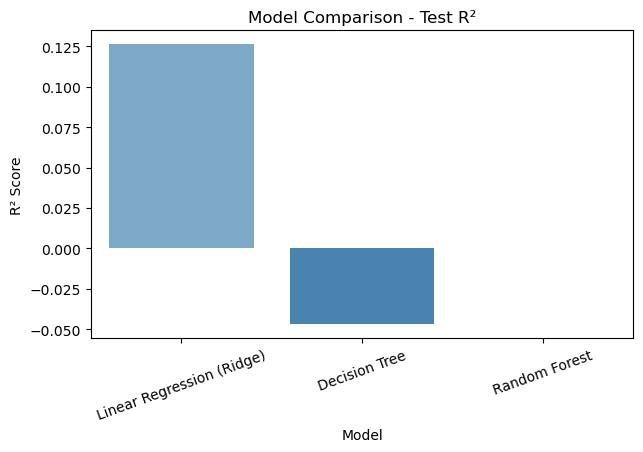

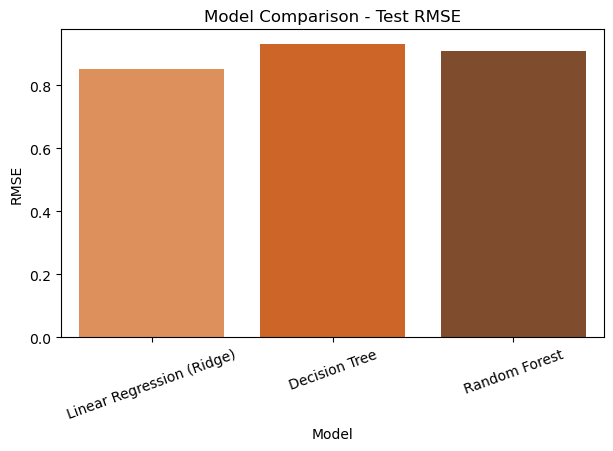

In [85]:
# Compare Models: R² Score & RMSE

import matplotlib.pyplot as plt
import seaborn as sns

# Results you already have
results = {
    "Linear Regression (Ridge)": {"Test R²": 0.126162, "Test RMSE": 0.850163},
    "Decision Tree": {"Test R²": -0.047048, "Test RMSE": 0.930615},
    "Random Forest": {"Test R²": 0.000544, "Test RMSE": 0.909219}
}

# Convert to DataFrame
res_df = pd.DataFrame(results).T.reset_index().rename(columns={"index": "Model"})

print("\nModel Comparison ")
print(res_df.to_string(index=False))

# --- Plot R² ---
plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="Test R²", data=res_df, palette="Blues_d")
plt.title("Model Comparison - Test R²")
plt.ylabel("R² Score")
plt.xticks(rotation=20)
plt.show()

# --- Plot RMSE ---
plt.figure(figsize=(7,4))
sns.barplot(x="Model", y="Test RMSE", data=res_df, palette="Oranges_d")
plt.title("Model Comparison - Test RMSE")
plt.ylabel("RMSE")
plt.xticks(rotation=20)
plt.show()


In [87]:
#  Hyperparameter Tuning 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error

RANDOM_STATE = 42


# Features/target
y = df["test_score"].copy()
X = df.drop(columns=["test_score"])

# Keep numeric only
X = X.select_dtypes(include=[np.number]).fillna(0)

# Feature selection (top 25 features)
selector = SelectKBest(score_func=f_regression, k=min(25, X.shape[1]))
X = pd.DataFrame(selector.fit_transform(X, y), columns=X.columns[selector.get_support()])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

# Ridge with GridSearchCV
ridge_pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("ridge", Ridge(random_state=RANDOM_STATE))
])

param_grid = {
    "ridge__alpha": np.logspace(-3, 3, 20)  # test alpha from 0.001 to 1000
}

ridge_grid = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring="r2", n_jobs=-1)
ridge_grid.fit(X_train, y_train)

# Best model evaluation
best_ridge = ridge_grid.best_estimator_
y_tr_pred, y_te_pred = best_ridge.predict(X_train), best_ridge.predict(X_test)

print("Best alpha:", ridge_grid.best_params_["ridge__alpha"])
print(f"Train R²: {r2_score(y_train, y_tr_pred):.4f}")
print(f"Test R²:  {r2_score(y_test, y_te_pred):.4f}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_tr_pred)):.4f}")
print(f"Test RMSE:  {np.sqrt(mean_squared_error(y_test, y_te_pred)):.4f}")


Best alpha: 233.57214690901213
Train R²: 0.2789
Test R²:  0.0913
Train RMSE: 0.8657
Test RMSE:  0.8670
